# Юнит 1

In [ ]:
a = [1,2,3]
b = a
c = [1,2,3]
print(a == b, a == c, a is b, a is c)
my_dict = {1:'jhdshfk', 2: 'dskjlkdsjflk'}

for key, value in my_dict.items():
    print(key, value)

print(my_dict.items())

# Юнит 2

In [ ]:
s = 'ddjhfkjd nfdn fdsjkfhdsf dsjhj'

print(s.isalpha())
def read_data():
    data = open('war_peace_processed.txt', 'rt', encoding='utf-8').read()
    data = data.split('\n')
    return data


# Функция подсчёта частоты употребления слова в тексте
def freq(target_word):  
    new_dict = dict() 
    for i in data: # СТРОКА С ОШИБКОЙ
        if i not in new_dict:
            new_dict[i] = 1
        else:
            new_dict[i] = new_dict.get(i) + 1
    return new_dict.get(target_word, 0)

In [ ]:
# Вызов функций
read_data()
freq('война')
def apply_discounts(products, stocks):
    """
    Напишите функцию apply_discounts(), которая снижает цену продуктов в словаре products на указанный в словаре stocks процент. 
    Функция должна вернуть результирующий словарь, ключи которого — товары, а значения — новые цены.
    Если продукта из словаря stocks нет в словаре products, то его необходимо пропустить. Цены округлите до второго знака после запятой.
    """

    products_stocked = products

    for key in stocks:
        if key in products_stocked:
            products_stocked[key] = products_stocked[key] * (1 - float(stocks[key].replace('%', ''))/100)
    return products_stocked


    
if __name__ == '__main__':
    products={
        "Oranges (packaged)": 114.99, 
        "Candy (Rotfront)": 280.00,
        "Boiled sausage": 199.99,
        "Juice J7 (orange)": 119.99,
        "Trout (Seven Seas)": 399.99
        }
    stocks = {
        "Boiled sausage": "33%",
        "Juice J7 (orange)": "12%",
        "Trout (Seven Seas)": "18%"
    }
    
    
    new_products = apply_discounts(products, stocks)
    print(new_products)

In [6]:
import pandas as pd

bronze_path = '../data/bronze_top.csv'
silver_path = '../data/silver_top.csv'
"""
Объедините две таблицы по странам таким образом, чтобы в результат вошли данные только о тех странах, которые есть в обоих рейтингах. 
При этом в качестве суффиксов для столбца c числом медалей укажите строки "_bronze" и "_silver", чтобы столбцы можно было различать.
Результат занесите в переменную merged.
"""

bronze_df = pd.read_csv(bronze_path, sep=',')
silver_df = pd.read_csv(silver_path, sep=',')

merged = bronze_df.merge(
    silver_df,
    on='Country',
    how='inner',
    suffixes=('_bronze', '_silver')
)

display(merged)

,Country,Total_bronze,Total_silver
0,United States,1052.0,1195.0
1,Soviet Union,584.0,627.0
2,United Kingdom,505.0,591.0
3,France,475.0,461.0


# Юнит 3

In [19]:
solar_data = pd.read_csv('../data/solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [20]:
for index in range(0, solar_data.shape[0]):
    if solar_data.iloc[index, 1] == -1.0:
        solar_data.iloc[index, 1] = (solar_data.iloc[index-1, 1]+solar_data.iloc[index+1, 1]) / 2

display(solar_data['cum_power'].mean())

664
45
647


23848.246987951807

In [21]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


In [24]:
solar_data['date'] = pd.to_datetime(solar_data['date'], dayfirst=False) 

solar_data['day_power'] = solar_data['cum_power'].diff()
display(solar_data)

,date,cum_power,day_power
0,2017-01-01,20111.0,NaN
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0
...,...,...,...
659,2018-10-22,28101.0,6.0
660,2018-10-23,28109.0,8.0
661,2018-10-24,28115.0,6.0
662,2018-10-25,28117.0,2.0


In [27]:
solar_data_m_y = solar_data.groupby(solar_data['date'].dt.to_period('M'))['day_power'].mean()
display(solar_data_m_y)

date
2017-01     3.233333
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64

<AxesSubplot:xlabel='date'>

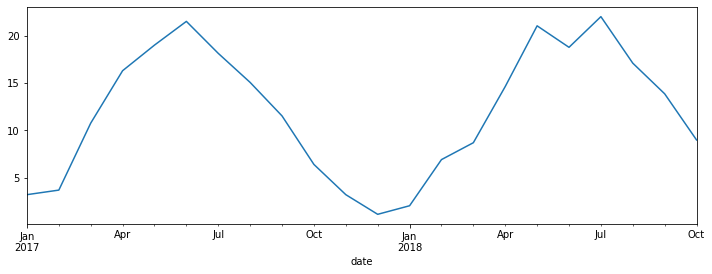

In [30]:
solar_data_m_y.plot(
    kind='line',
    figsize=(12,4)
)